# Optimal Portfolio of a risk-free and two risky assets

## Investors Details

|Expected Return | Risk Aversion | Risk | VaR| Investment Horizon | 
|----------------|---------------|-------|---|-------------------|
|12% | Moderate | 20% | .02| 5 years|

## Risky Assets Selection

### Constants for the market

In [317]:
#risk free rate
rf_rate = .09
coeff_A = 6.3

### Importing the necessary libraries

In [40]:
import pandas as pd
import missingno as msno
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing historical stocks data of DSE

In [87]:
df = pd.read_csv('../data/total_daily_data.csv', header = 0)
df = df.set_index(pd.to_datetime(df['date'])).drop('date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995836 entries, 2019-02-03 to 2019-06-30
Data columns (total 6 columns):
symbol    995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(3)
memory usage: 53.2+ MB


In [88]:
df_sorted = df.sort_index()
df_sorted.tail(10)

,symbol,open,high,low,close,volume
date,,,,,,
2019-08-29,BATBC,1224.0,1230.00,1205,1209.80,32499
2019-08-29,METROSPIN,7.7,7.80,7.5,7.60,365479
2019-08-29,IFADAUTOS,70.2,70.20,67.6,67.90,294887
2019-08-29,DSEX,5140.0,5144.96,5093.19,5095.78,4.02918e+07
2019-08-29,TRUSTB1MF,4.2,4.30,4.1,4.20,546418
2019-08-29,IFIC,9.8,9.80,9.6,9.60,467680
2019-08-29,BAYLEASING,15.0,15.00,14.1,14.70,15217
2019-08-29,PROGRESLIF,88.1,90.50,88.1,89.80,3506
2019-08-29,BATASHOE,980.0,980.00,968,978.20,913


symbol,00DS30,00DSEGEN,00DSES,00DSEX,01.Bank,02.Cement,03.Ceramics_Sector,04.Engineering,05.Financial_Institutions,06.Food_&_Allied,...,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,WONDERTOYS,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1843.18,4342.31,1174.02,4941.52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,213.5,53.6,68.25,NaN,NaN,16.6,8.5
2015-01-05,1844.42,4342.31,1176.31,4926.41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,211.6,55.4,68.25,NaN,NaN,16.4,8.4
2015-01-06,1859.07,4342.31,1186.51,4969.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,212.5,55.4,68.25,NaN,NaN,16.4,8.5
2015-01-07,1857.15,4342.31,1183.56,4963.66,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,209.3,55.4,68.25,NaN,NaN,16.4,8.3
2015-01-08,1854.14,4342.31,1181.71,4968.71,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,210.1,54.9,68.25,NaN,NaN,16.6,8.3


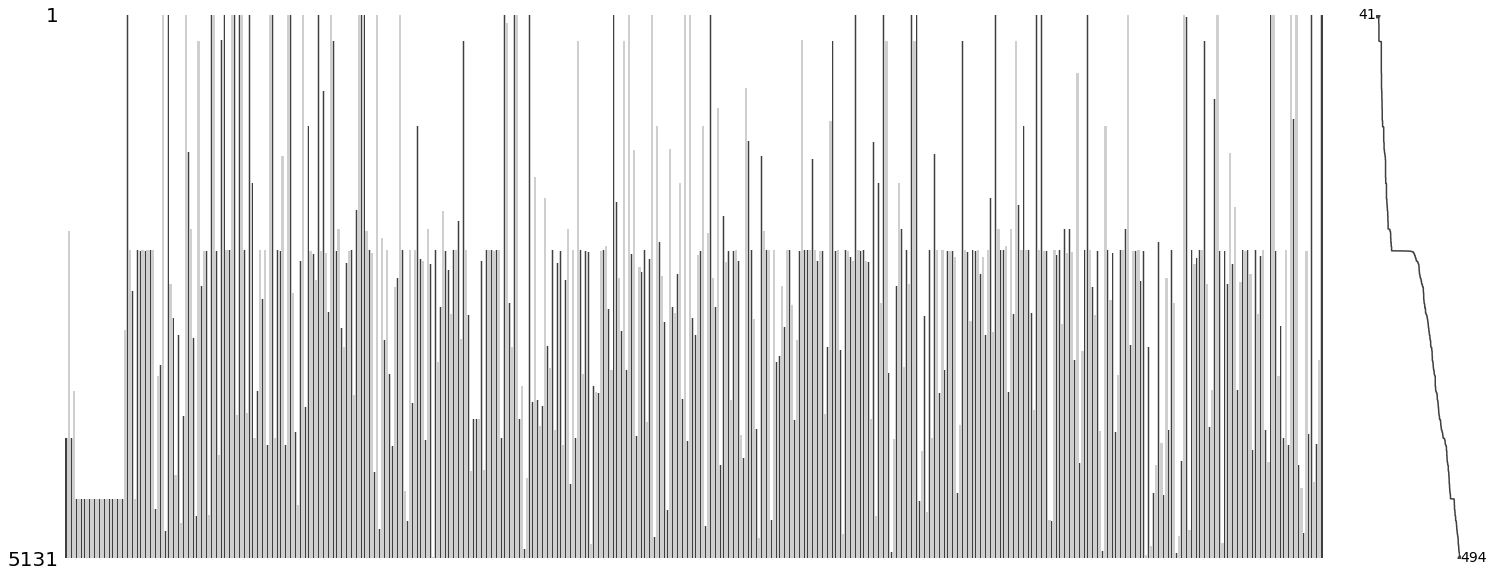

In [172]:
df_pivoted = pd.pivot_table(df_sorted, values='close', index='date', columns='symbol')
df_pivoted = df_pivoted.fillna(method="ffill")
msno.matrix(df_pivoted)
df_pivoted = df_pivoted.loc['2015-01-01':, :]
df_pivoted.head()

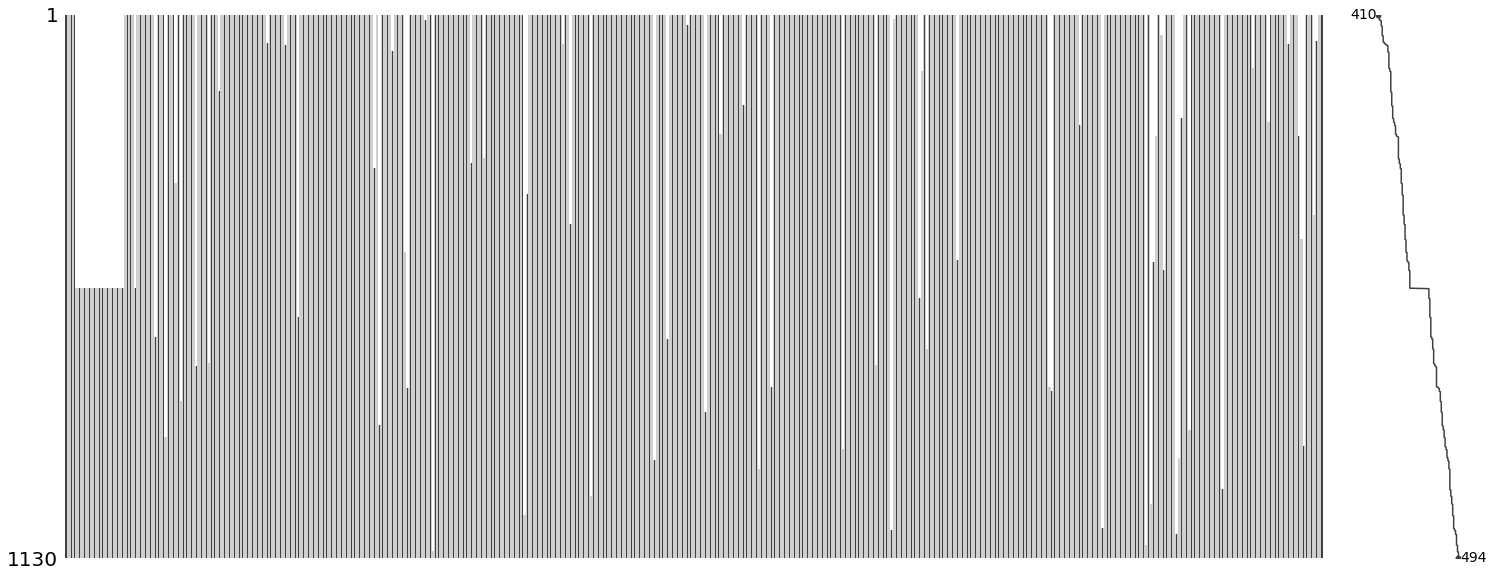

In [166]:
msno.matrix(df_pivoted)

### Calculating returns, standard deviations and sharpe ratios

In [193]:
df_rss = pd.DataFrame(columns=['Symbol', 'Annual Return', 'Standard Deviation', 'Sharpe Ratio']) 
for column in df_pivoted.columns:
    if len(df_pivoted[column].dropna()) > 502: 
        ann_return = (((1+df_pivoted[column].dropna().pct_change(1)).cumprod().iloc[-1])**(251/len(df_pivoted[column].dropna()))) -1 
        ann_std = df_pivoted[column].dropna().pct_change(1).std() * (252**.5)
        shrp = (ann_return - rf_rate) / std
        df_rss = df_rss.append({'Symbol': column, 'Annual Return': ann_return, 'Standard Deviation': ann_std, 'Sharpe Ratio': shrp}, ignore_index= True)
df_rss = df_rss.set_index('Symbol')
top_50 = df_rss.sort_values('Sharpe Ratio', ascending= False).iloc[:50]
top_50_symbol = top_50.index.unique()
top_50
    

,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
03.Ceramics_Sector,0.792906,1.486791,16.367425
KAY&QUE,0.791988,0.567212,16.346052
STANCERAM,0.663360,0.513062,13.350912
BDAUTOCA,0.635915,0.614946,12.711827
AZIZPIPES,0.589325,0.510243,11.626979
10.Jute,0.576506,1.205987,11.328472
RENWICKJA,0.552351,0.456381,10.766009
MONNOCERA,0.548448,0.572145,10.675131
AZIZPIPES,0.530532,0.742344,10.257947


In [322]:
df_rss.sort_values('Standard Deviation', ascending= True).iloc[200:250]

,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
MALEKSPIN,-6.759409e-02,0.328058,-3.669637
ACIFORMULA,3.340678e-02,0.329230,-1.317794
LRGLOBMF1,4.986022e-02,0.329730,-0.934670
GREENDELT,-4.721851e-02,0.330407,-3.195184
1JANATAMF,-5.035872e-02,0.330432,-3.268305
ARGONDENIM,-1.234255e-01,0.330549,-4.969693
GHCL,-2.404264e-02,0.330766,-2.655525
APEXTANRY,-1.928385e-02,0.331264,-2.544715
RANFOUNDRY,6.698859e-02,0.331351,-0.535829


In [339]:
df_corr_cov = df_pivoted.loc[:,top_50_symbol]
df_corr_cov = df_corr_cov.fillna(method='ffill')

In [340]:
df_corr_cov.pct_change().corr()

Symbol,03.Ceramics_Sector,KAY&QUE,STANCERAM,BDAUTOCA,AZIZPIPES,10.Jute,RENWICKJA,MONNOCERA,AZIZPIPES,DULAMIACOT,...,DSHGARME,13.Paper_&_Printing,INTECH,SHAHJABANK,HAKKANIPUL,APEXSPINN,UNITEDINS,DBH1STMF,MEGCONMILK,ICBAMCL2ND
Symbol,,,,,,,,,,,,,,,,,,,,,
03.Ceramics_Sector,1.000000,-0.007928,0.154829,0.150891,0.046858,0.002534,0.041256,0.206060,0.009845,0.026135,...,-0.035199,0.001196,-0.009467,-0.004778,0.128093,-0.031487,-0.056882,-0.013347,0.024879,-0.007850
KAY&QUE,-0.007928,1.000000,0.118782,0.081856,0.142467,0.054455,0.111574,0.115718,0.026880,0.140716,...,0.170494,0.057005,0.100584,0.032582,0.146133,0.087059,0.063688,0.035317,0.101425,0.038200
STANCERAM,0.154829,0.118782,1.000000,0.143409,0.060454,0.010219,0.093668,0.325871,-0.018612,0.101468,...,0.114563,0.002122,0.045114,0.039486,0.329909,0.148095,0.020075,-0.022210,0.045611,0.022975
BDAUTOCA,0.150891,0.081856,0.143409,1.000000,0.172297,0.101391,0.147951,0.195503,-0.010799,0.038796,...,0.131732,0.084587,0.101414,0.035385,0.170914,0.161441,-0.018184,0.023004,0.065785,-0.004406
AZIZPIPES,0.046858,0.142467,0.060454,0.172297,1.000000,0.085236,0.165765,0.177988,-0.003856,0.072638,...,0.124422,-0.004508,0.024765,-0.016958,0.111731,0.118423,0.006881,-0.017458,0.084688,0.021718
10.Jute,0.002534,0.054455,0.010219,0.101391,0.085236,1.000000,0.114203,0.097212,0.033568,0.029113,...,0.095559,0.100790,-0.024226,0.026254,0.012748,0.000905,-0.007230,0.032907,0.053436,0.054119
RENWICKJA,0.041256,0.111574,0.093668,0.147951,0.165765,0.114203,1.000000,0.204804,0.033786,0.032802,...,0.229347,0.049374,0.040030,-0.020555,0.121955,0.181342,0.048051,-0.009507,0.028230,-0.019317
MONNOCERA,0.206060,0.115718,0.325871,0.195503,0.177988,0.097212,0.204804,1.000000,0.044362,0.104236,...,0.105429,0.041751,0.124782,0.016980,0.221051,0.154506,0.024576,0.013540,0.063905,-0.034093
AZIZPIPES,0.009845,0.026880,-0.018612,-0.010799,-0.003856,0.033568,0.033786,0.044362,1.000000,0.031693,...,0.005908,0.036262,0.041706,-0.041153,0.037930,0.015650,0.021114,-0.002728,0.020195,-0.033436


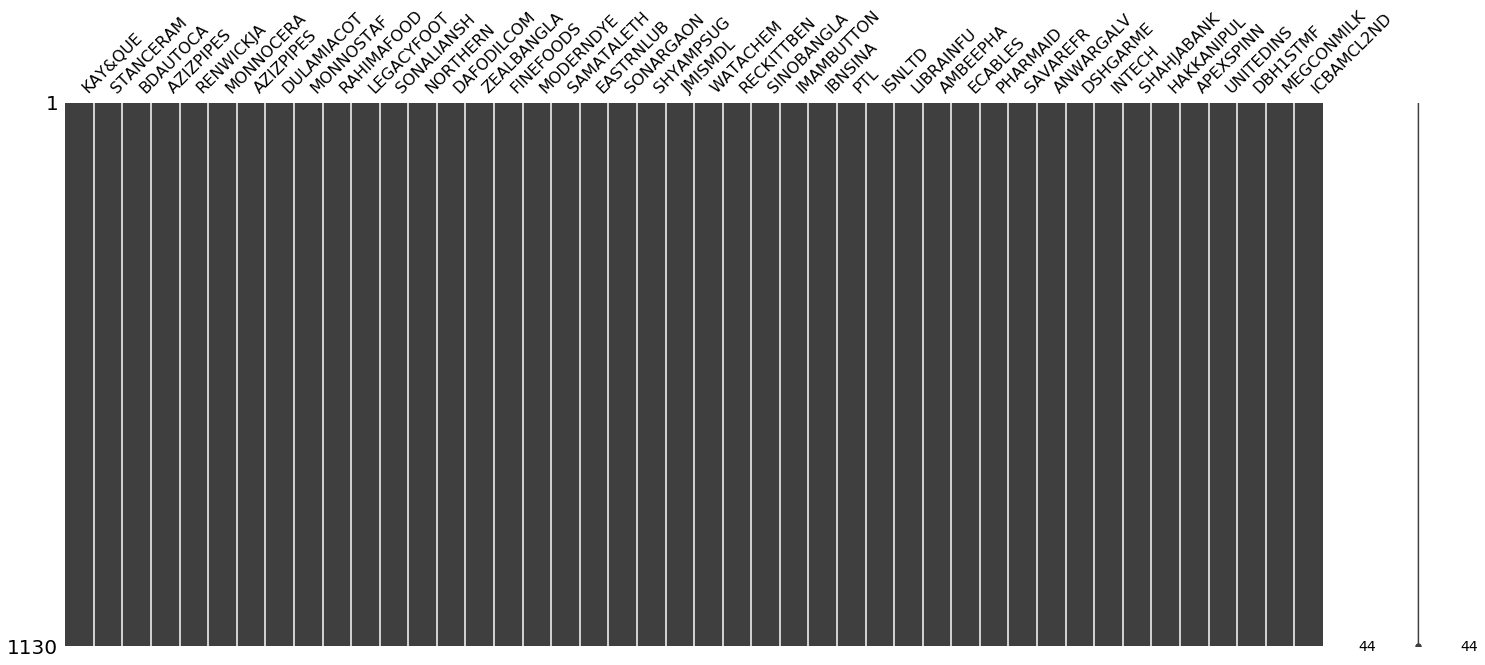

In [197]:
msno.matrix(df_corr_cov)

### Selected Risky Assets

In [354]:
risky_assets = ['UPGDCL', 'MONNOSTAF']
port_assets = df_rss.loc[risky_assets, :]
port_assets

,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
UPGDCL,0.288286,0.365512,4.617166
MONNOSTAF,0.432571,0.607168,7.976895


In [355]:
port_df = pd.DataFrame(columns = ['Weights R', 'Weights S', 'Portfolio Return', 'Portfolio Std', 'Portfolio Sharpe Ratio' ])
returns_assets = port_assets['Annual Return']
std_assets = port_assets['Standard Deviation']
cov = df_pivoted[risky_assets].pct_change(1).cov().loc[risky_assets[0], risky_assets[1]]
weights = pd.Series(np.arange(0,1.01,.01))
for each in weights:
    port_return = each*returns_assets[0]+(1 - each)*returns_assets[1]
    port_std = np.sqrt(np.square(each*std_assets[0]) + np.square((1-each)*std_assets[1]) + 2*each*(1-each)*cov) 
    port_shrp = (port_return - rf_rate ) / port_std
    port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
port_df

,Weights R,Weights S,Portfolio Return,Portfolio Std,Portfolio Sharpe Ratio
0,0.00,1.00,0.432571,0.607168,0.564211
1,0.01,0.99,0.431128,0.601108,0.567499
2,0.02,0.98,0.429685,0.595070,0.570832
3,0.03,0.97,0.428243,0.589056,0.574211
4,0.04,0.96,0.426800,0.583066,0.577636
...,...,...,...,...,...
96,0.96,0.04,0.294058,0.351732,0.580151
97,0.97,0.03,0.292615,0.355015,0.570722
98,0.98,0.02,0.291172,0.358408,0.561293
99,0.99,0.01,0.289729,0.361908,0.551878


In [356]:
optimal = port_df.loc[port_df['Portfolio Sharpe Ratio'].idxmax()]
rp_var = (optimal['Portfolio Return'] - rf_rate)/ optimal['Portfolio Std']**2
optimal = optimal.append(pd.Series([rp_var], index=['Risk Premium to VAR']))
optimal

Weights R                 0.610000
Weights S                 0.390000
Portfolio Return          0.344557
Portfolio Std             0.325252
Portfolio Sharpe Ratio    0.782647
Risk Premium to VAR       2.406281
dtype: float64

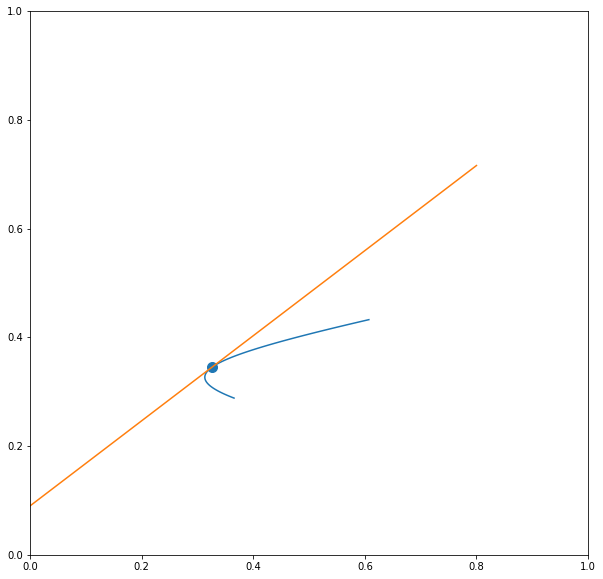

In [357]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 1)
plt.xlim(0,1)
plt.plot(port_df['Portfolio Std'], port_df['Portfolio Return'])
plt.scatter(optimal['Portfolio Std'], optimal['Portfolio Return'], s=100)
polynomial = np.poly1d(np.polyfit([0,optimal['Portfolio Std']], [rf_rate,optimal['Portfolio Return']], 1))
x_axis = np.linspace(0,.80)
y_axis = polynomial(x_axis)
plt.plot(x_axis, y_axis)

In [353]:
port_df.to_clipboard()

In [318]:
y = optimal['Risk Premium to VAR']/ coeff_A
y

0.6196499204562596